## Importation :

In [52]:
# Visualisation des données
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='darkgrid')

In [53]:
# Pré-traitement des données
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [54]:
# Pour tester les performances des modèles utilisés
from sklearn import metrics

In [55]:
# Classification
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

## Data preparation
### Loading data

In [56]:
data_nasa = pd.read_csv('./datas/nasa.csv')
data_nasa.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [57]:
data_nasa.shape

(4687, 40)

### Data analysis

In [58]:
data_nasa['Hazardous'].value_counts()

Hazardous
False    3932
True      755
Name: count, dtype: int64

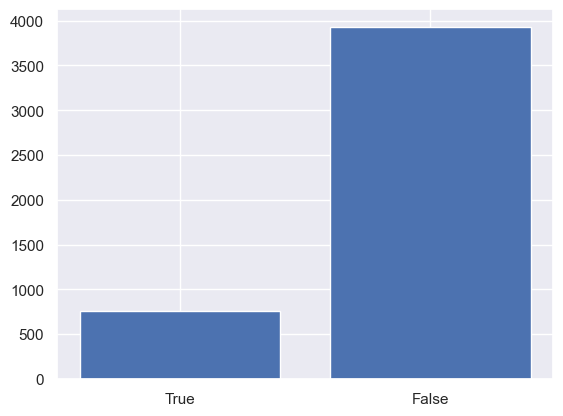

In [59]:
True_lignes =np.sum(data_nasa['Hazardous'] == True)
False_lignes =np.sum(data_nasa['Hazardous'] == False)
plt.bar(["True","False"],height=[True_lignes,False_lignes])
plt.show()

we see that they are unbalenced  not Hazardous more then Hazardous :  
- not Hazardous: 3932.  
- Hazardous : 755.

In [60]:
data_nasa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [61]:
data_nasa.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

We can see that there are no missing values in our dataset 

In [62]:
# show unique value
data_nasa.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [63]:
data_nasa =data_nasa.drop(['Neo Reference ID','Close Approach Date','Epoch Date Close Approach','Orbit ID','Name','Orbit Determination Date','Equinox','Orbiting Body'],axis=1)

In [64]:
data_nasa.shape

(4687, 32)

In [65]:
data_nasa.describe().T

,count,mean,std,min,25%,50%,75%,max
Absolute Magnitude,4687.0,2.226786e+01,2.890972e+00,1.116000e+01,2.010000e+01,2.190000e+01,2.450000e+01,3.210000e+01
Est Dia in KM(min),4687.0,2.046042e-01,3.695734e-01,1.010543e-03,3.346224e-02,1.108039e-01,2.538370e-01,1.557955e+01
Est Dia in KM(max),4687.0,4.575089e-01,8.263912e-01,2.259644e-03,7.482384e-02,2.477650e-01,5.675969e-01,3.483694e+01
Est Dia in M(min),4687.0,2.046042e+02,3.695734e+02,1.010543e+00,3.346224e+01,1.108039e+02,2.538370e+02,1.557955e+04
Est Dia in M(max),4687.0,4.575089e+02,8.263912e+02,2.259644e+00,7.482384e+01,2.477650e+02,5.675969e+02,3.483694e+04
Est Dia in Miles(min),4687.0,1.271351e-01,2.296422e-01,6.279224e-04,2.079246e-02,6.885032e-02,1.577270e-01,9.680682e+00
Est Dia in Miles(max),4687.0,2.842828e-01,5.134956e-01,1.404077e-03,4.649336e-02,1.539540e-01,3.526882e-01,2.164666e+01
Est Dia in Feet(min),4687.0,6.712737e+02,1.212511e+03,3.315431e+00,1.097842e+02,3.635298e+02,8.327987e+02,5.111402e+04
Est Dia in Feet(max),4687.0,1.501014e+03,2.711257e+03,7.413530e+00,2.454850e+02,8.128774e+02,1.862194e+03,1.142944e+05
Relative Velocity km per sec,4687.0,1.397081e+01,7.293223e+00,3.355041e-01,8.432865e+00,1.291789e+01,1.807765e+01,4.463375e+01


on observe la distribution des defferantes variable :

In [66]:
columns_nasa =data_nasa.copy()
columns_nasa.drop(['Hazardous'],axis=1,inplace=True)
columns =list(columns_nasa.columns)

In [67]:
columns_nasa.shape

(4687, 31)

<Axes: >

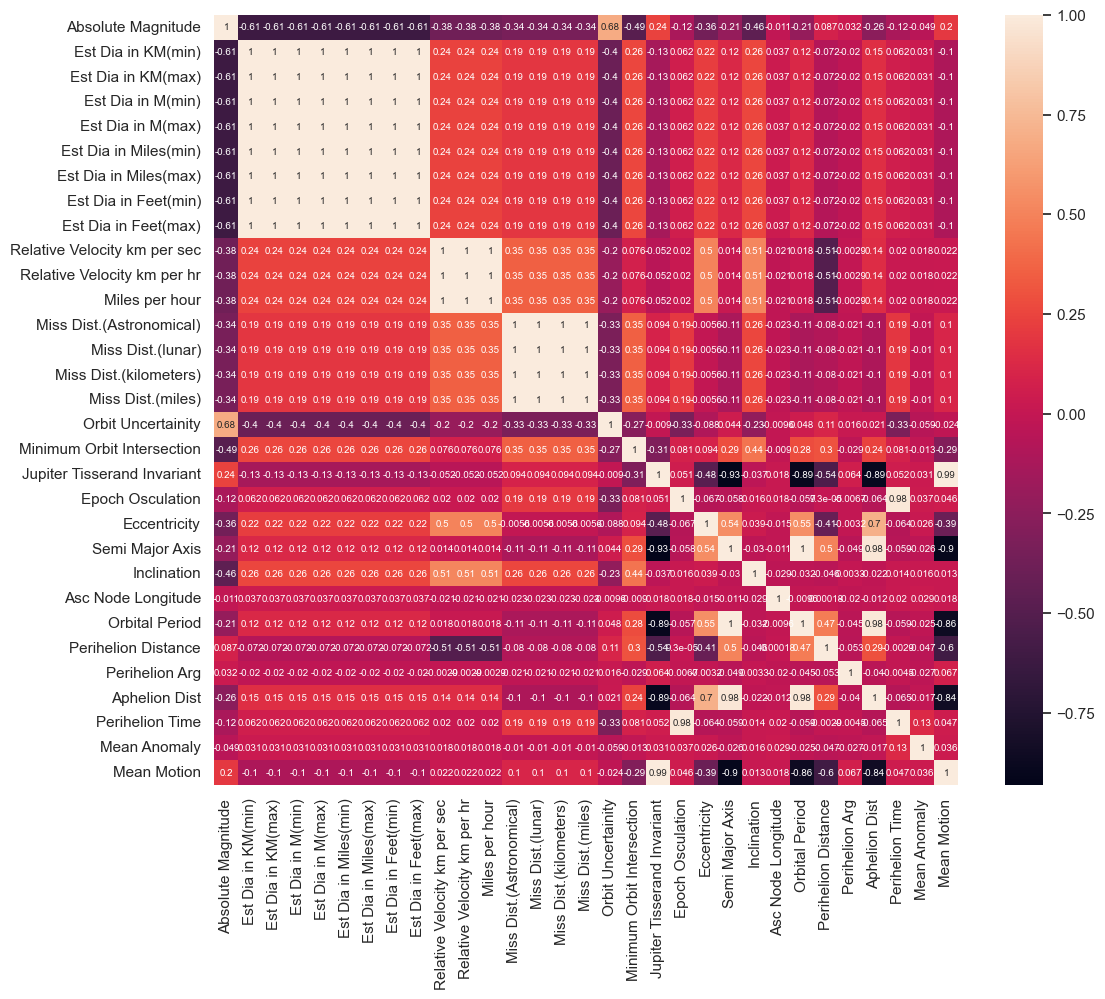

In [68]:
plt.figure(figsize=(12,10))
sns.heatmap(columns_nasa.corr(numeric_only=True),annot=True,annot_kws={'fontsize' : 7})

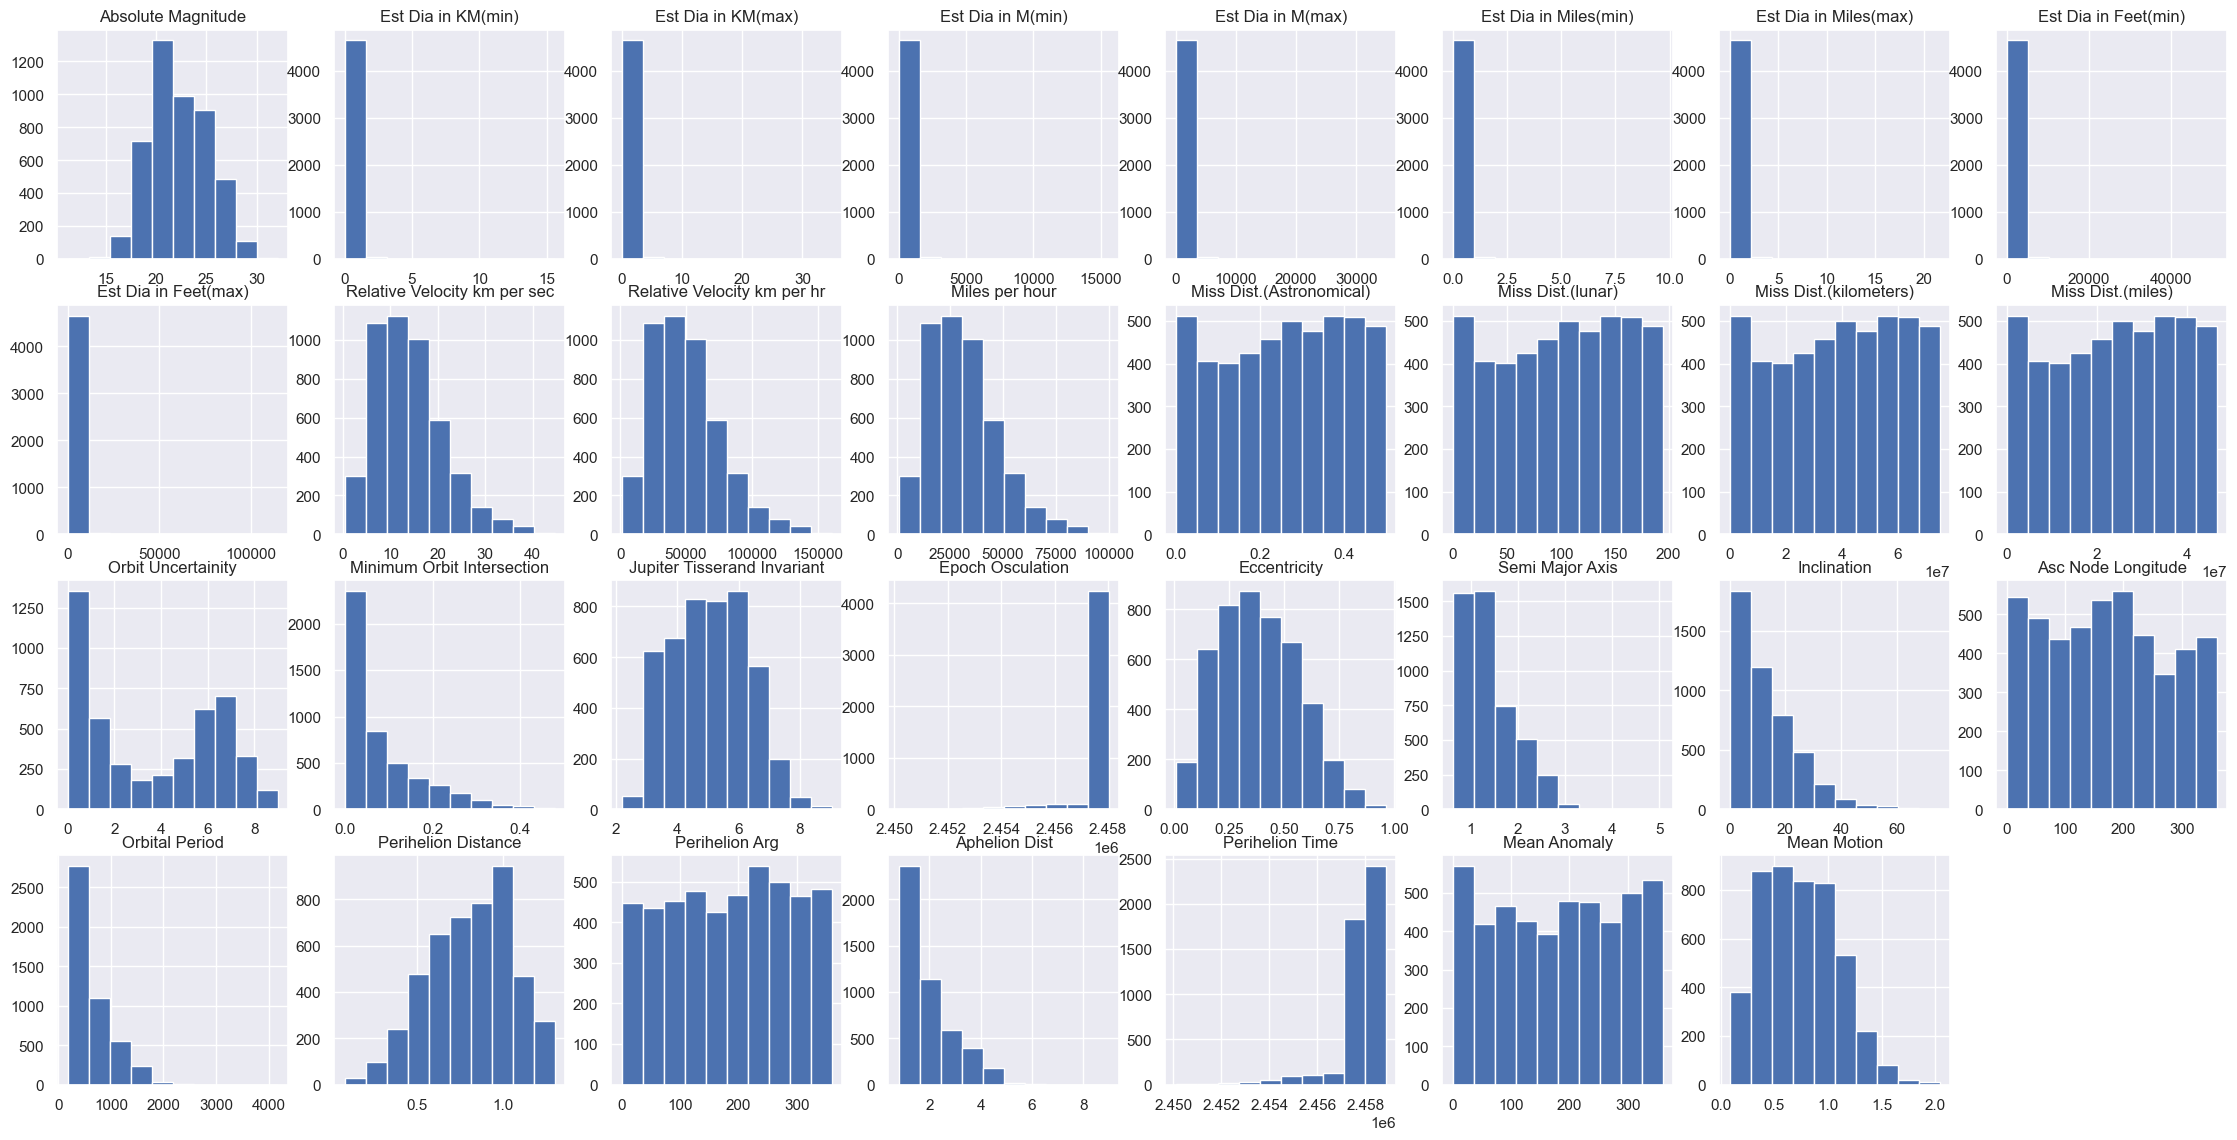

In [69]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(28,28))
index = 1
for column in columns :
    plt.subplot(8,8,index)
    plt.hist(data_nasa[column])
    plt.title(column.replace('_',' '))
    index +=1

We now observe the average distributions by class, making sure to use a normalized histogram since the classes are highly unbalanced and thus to show the distribution efficiently

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


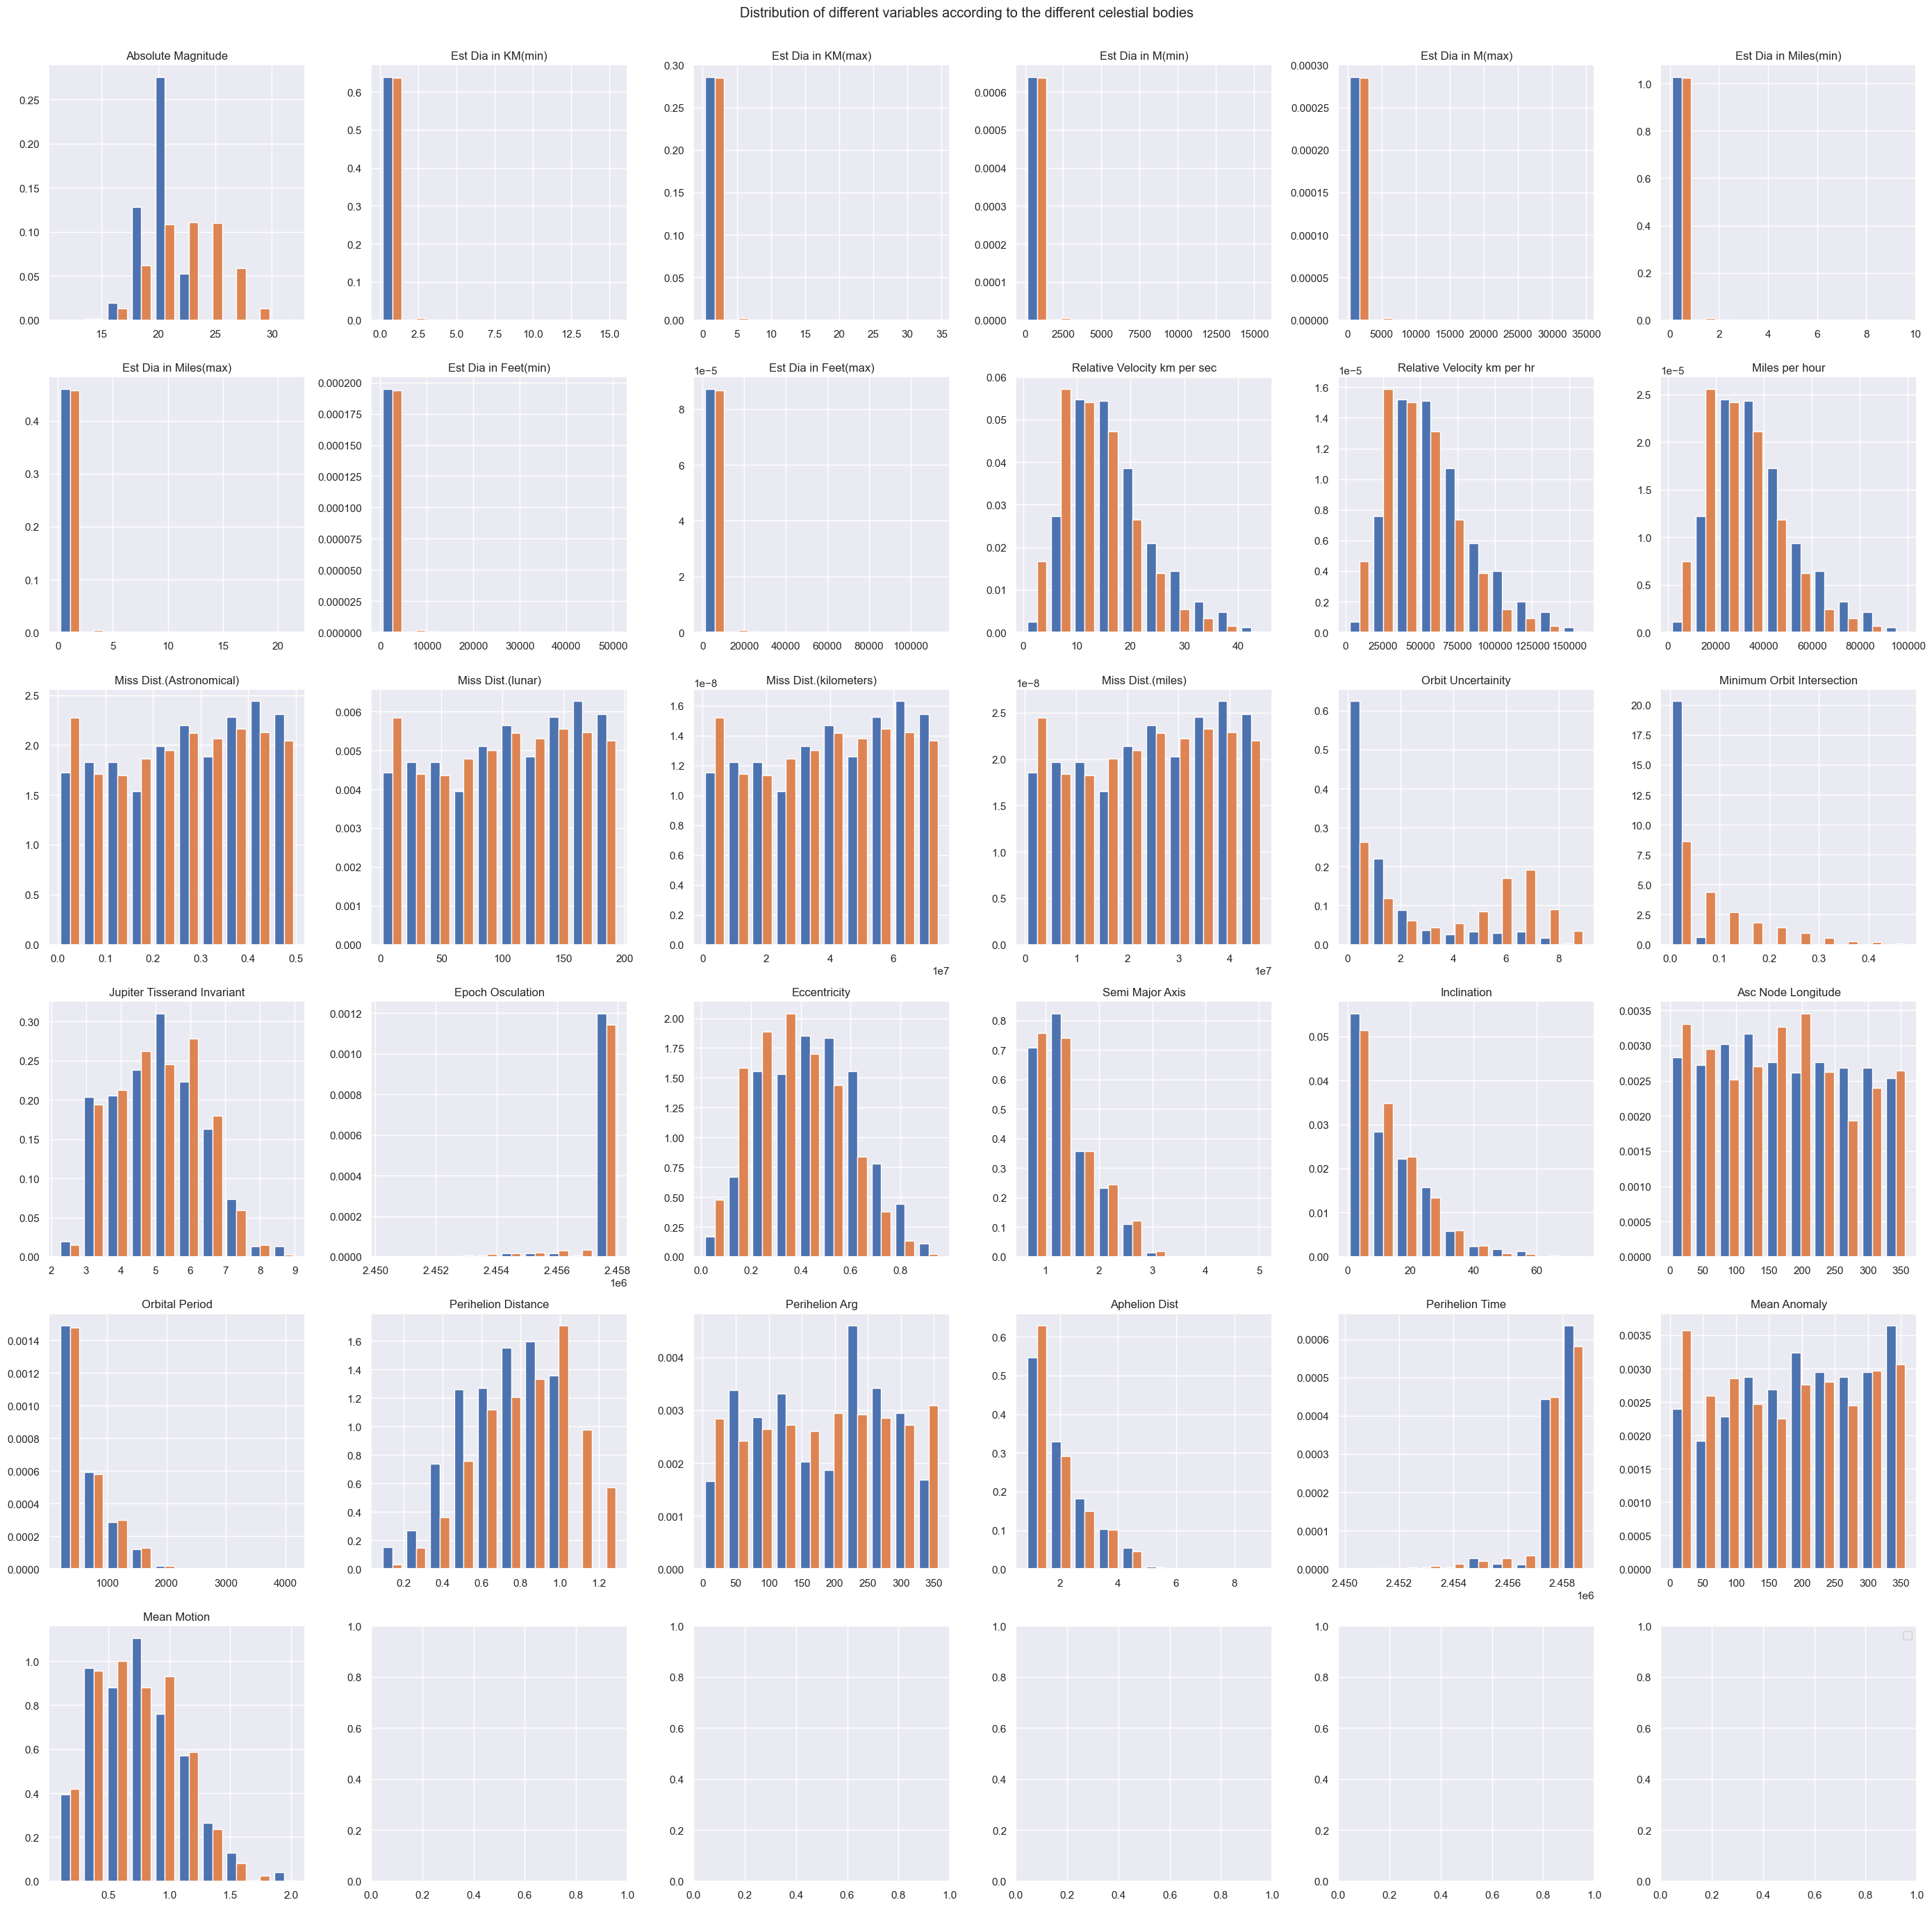

In [70]:

fig, axes = plt.subplots(6, 6, figsize=(28, 28))
fig.suptitle('Distribution of different variables according to the different celestial bodies')
i = 0
for column in columns:
    axes[int(i / 6), i % 6].hist([
        data_nasa[data_nasa["Hazardous"] == True][column],
        data_nasa[data_nasa["Hazardous"] == False][column]
    ], label=['True', 'False'], density=True)
    
    # Set title for the subplot
    axes[int(i / 6), i % 6].set_title(column.replace('_', ' '))
    
    i += 1

plt.legend()
plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()


Thus we can see that several variables are not significant in their classification:   
- Est Dia in KM(max)  
- Est Dia in M(min)  
- Est Dia in M(max)  
- Est Dia in Miles(min)  
- Est Dia in Miles(min)  
- Est Dia in Feet(min)  
- Est Dia in Feet(max)  
- Relative Velocity km per sec   
- Miles per hour  
- Miss Dist.(Astronomical)  
- Miss Dist.(lunar)   
- Miss Dist.(miles)

So we will analyze later the interest of these variables and their removal if it adds quality to the classification. We now analyze the distributions of each 

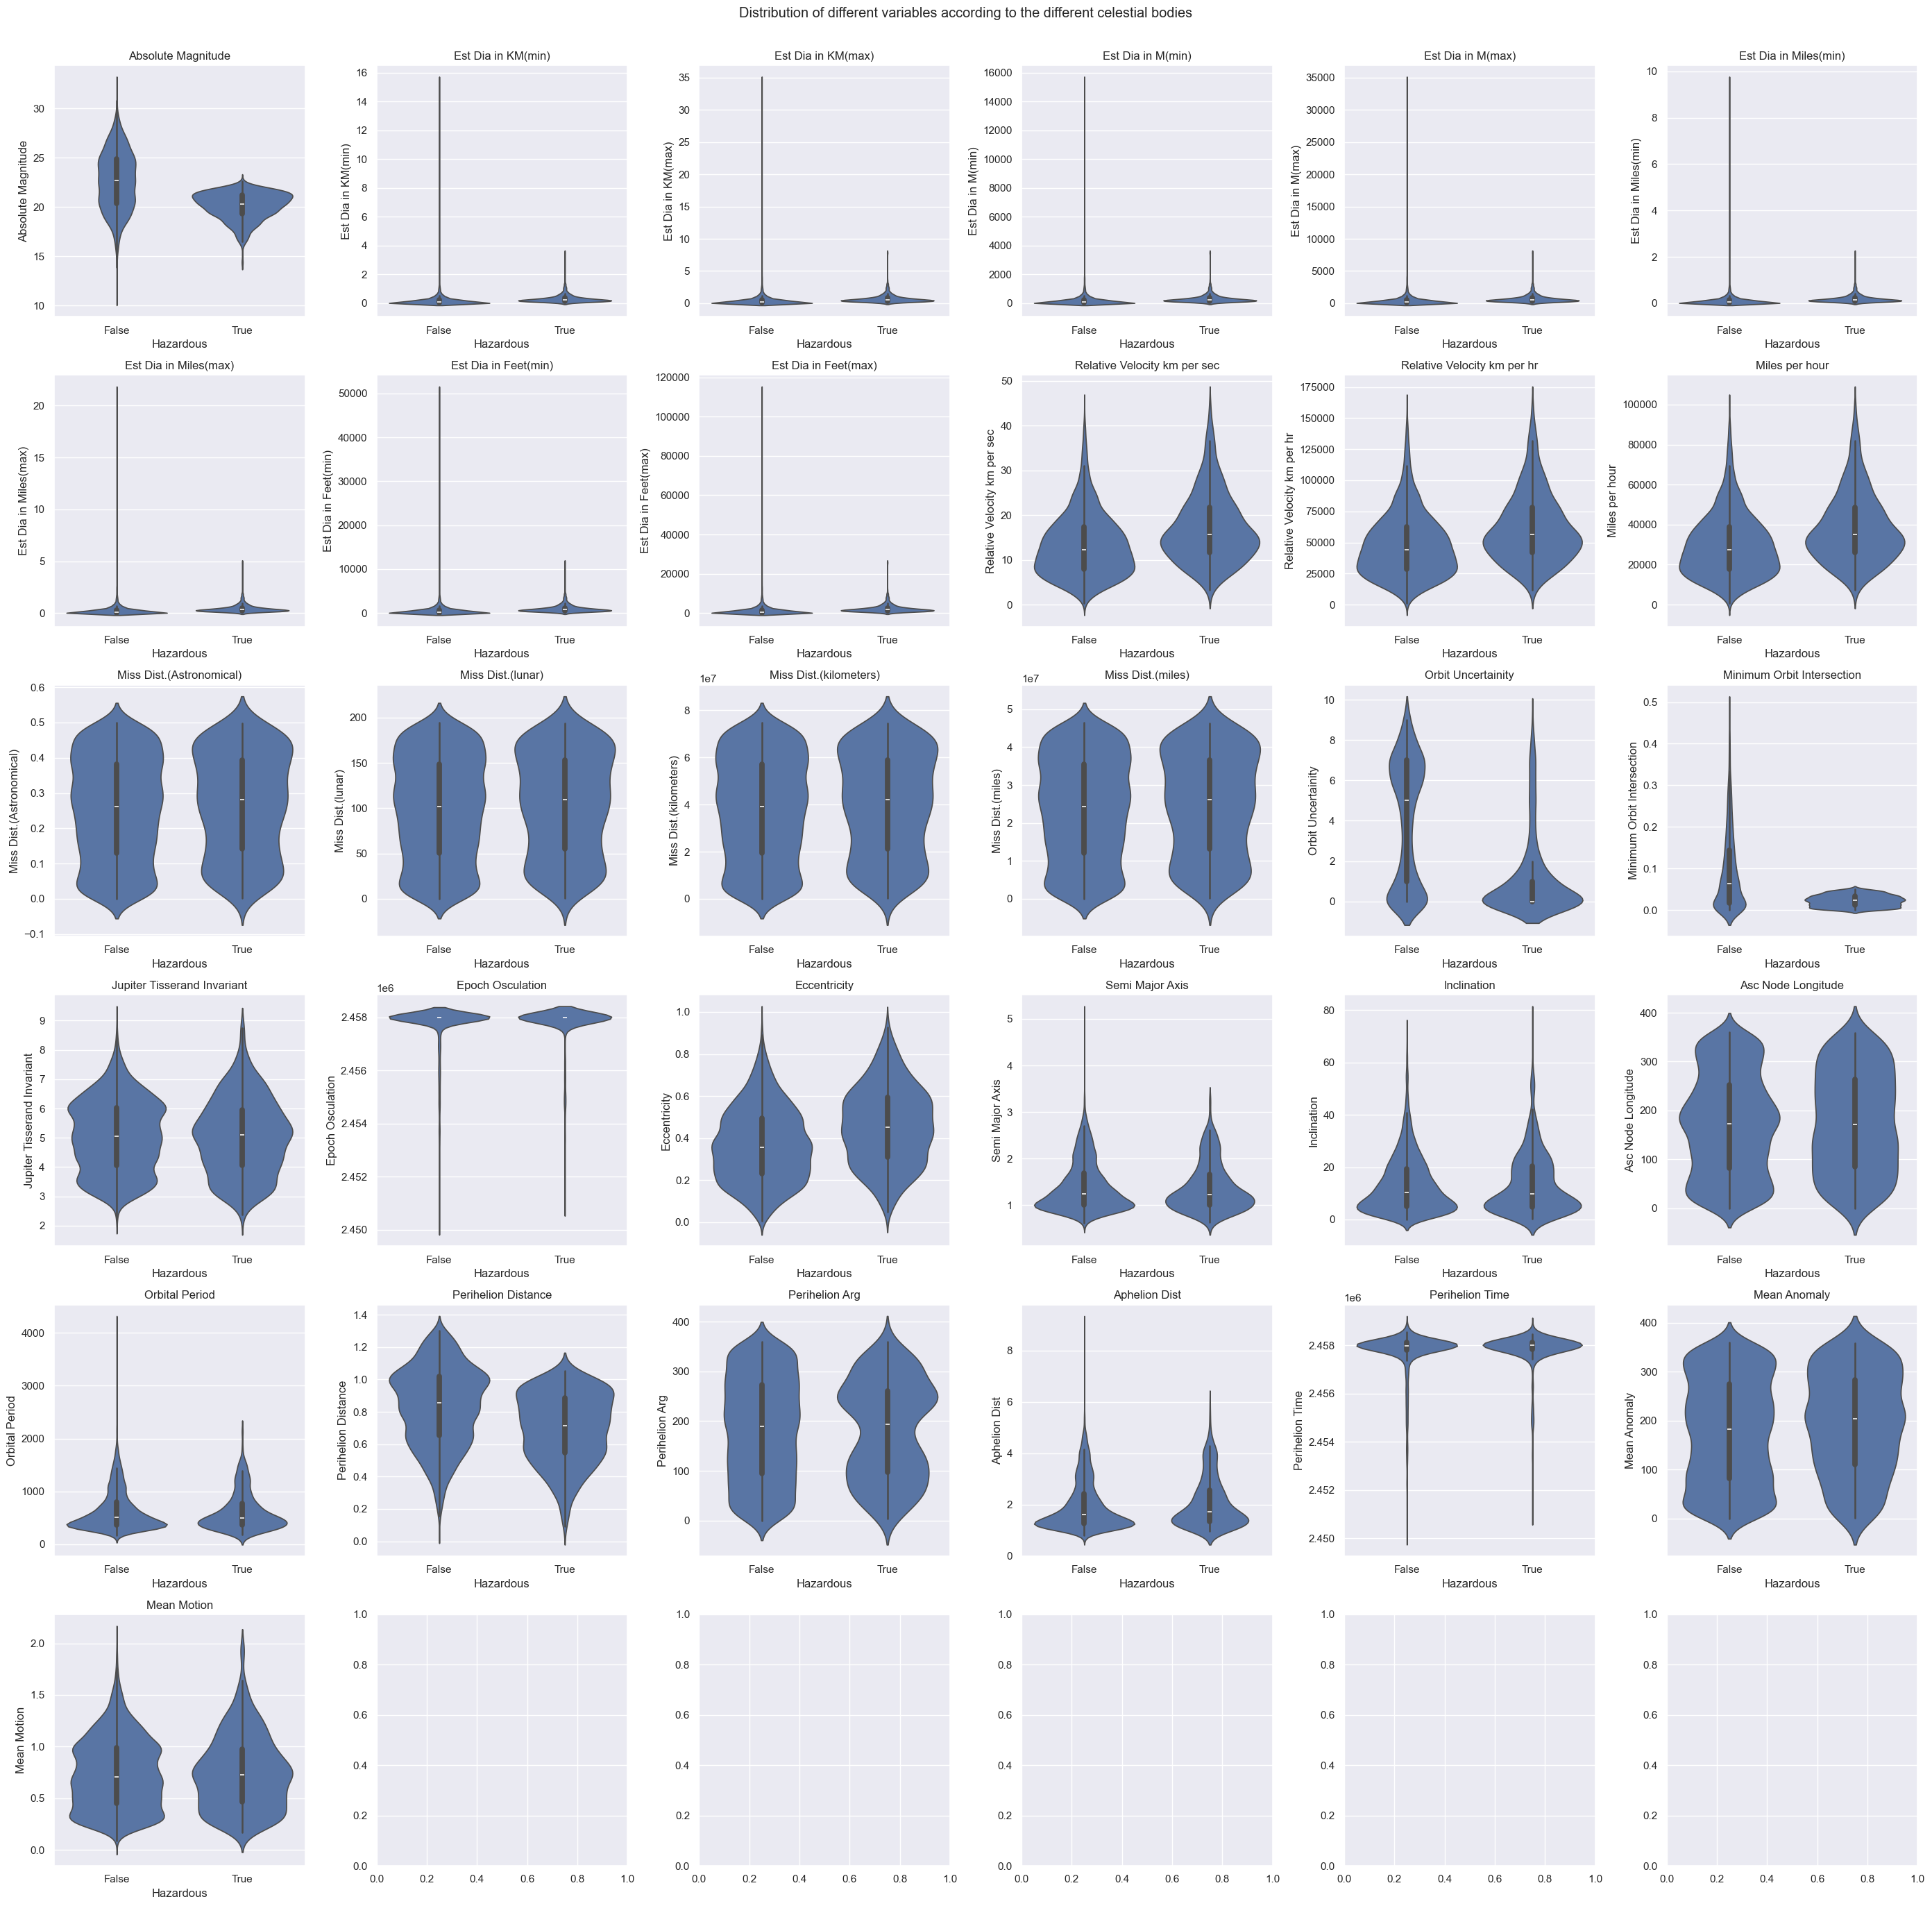

In [71]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(6, 6, figsize=(28,28))
fig.suptitle('Distribution of different variables according to the different celestial bodies')

i = 0
for column in columns :
    sns.violinplot(ax=axes[int(i/6), i%6],data=data_nasa ,x='Hazardous', y=column)
    axes[int(i/6), i%6].set_title(column.replace('_',' '))
    i += 1

plt.tight_layout()
plt.subplots_adjust(top=0.95)

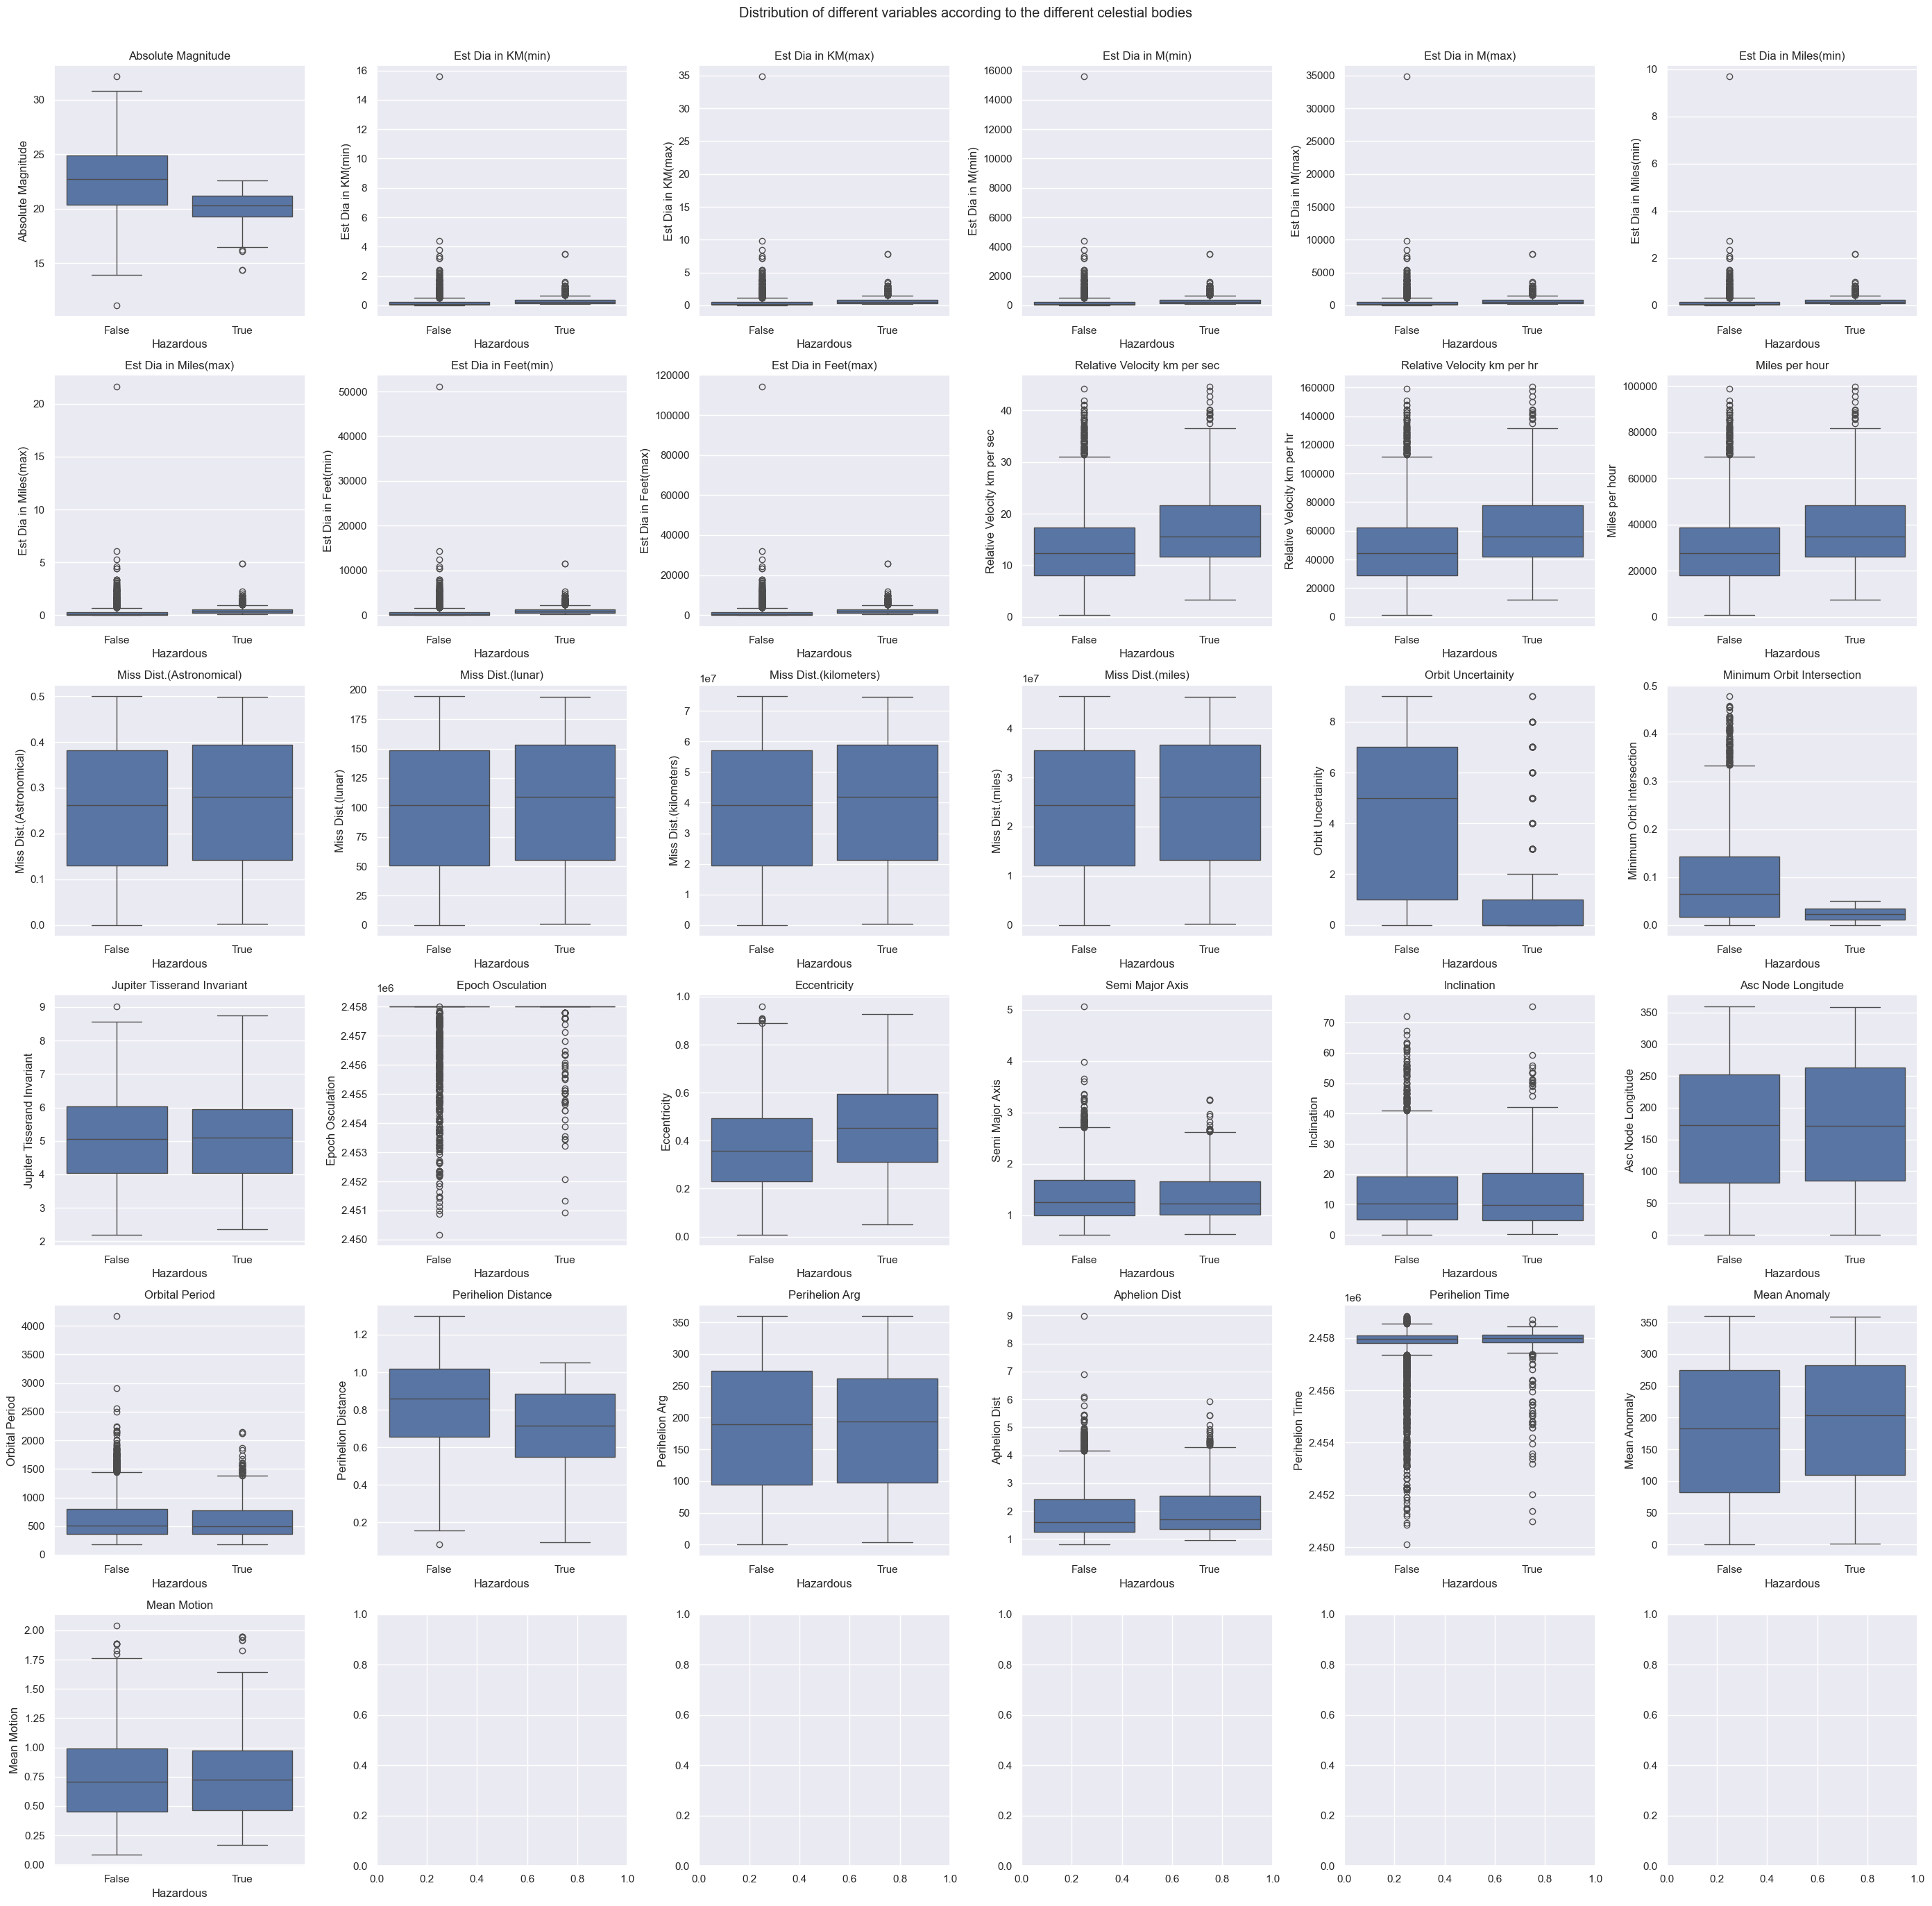

In [72]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(6, 6, figsize=(28, 28))
fig.suptitle('Distribution of different variables according to the different celestial bodies')
i = 0
for column in columns:
    sns.boxplot(ax=axes[int(i / 6), i % 6], data=data_nasa, x='Hazardous', y=column)
    axes[int(i / 6), i % 6].set_title(column.replace('_', ' '))
    i += 1
plt.tight_layout()
plt.subplots_adjust(top=0.95) 
plt.show()

### Preparation of the data
To do this we will go through two steps: 
- We remove superfluous variables 
- We normalize our data


In [73]:
data_nasa.drop(['Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(min)',
 'Est Dia in Feet(min)','Est Dia in Feet(max)','Relative Velocity km per sec','Miles per hour','Miss Dist.(Astronomical)',
 'Miss Dist.(lunar)','Miss Dist.(miles)'
],inplace=True,axis=1)
data_nasa.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,0.176763,22017.003799,62753692.0,5,0.025282,4.634,2458000.5,0.425549,...,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.202951,65210.346095,57298148.0,3,0.186935,5.457,2458000.5,0.351674,...,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.321655,27326.560182,7622911.5,0,0.043058,4.557,2458000.5,0.348248,...,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.012229,40225.948191,42683616.0,6,0.005512,5.093,2458000.5,0.216578,...,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.176763,35426.991794,61010824.0,1,0.034798,5.154,2458000.5,0.210448,...,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [74]:
data_nasa.shape

(4687, 21)

In [75]:
features_nasa = data_nasa.copy()
etiq = features_nasa['Hazardous']
features_nasa.drop(['Hazardous'], inplace=True, axis = 1)
features_nasa.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,21.6,0.127220,0.176763,22017.003799,62753692.0,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,21.3,0.146068,0.202951,65210.346095,57298148.0,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,20.3,0.231502,0.321655,27326.560182,7622911.5,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,27.4,0.008801,0.012229,40225.948191,42683616.0,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,21.6,0.127220,0.176763,35426.991794,61010824.0,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [76]:
etiq.value_counts()

Hazardous
False    3932
True      755
Name: count, dtype: int64

We now proceed to the normalization of the parameters of our problem

In [77]:
features_nasa_scaled =StandardScaler().fit_transform(features_nasa)
features_nasa_scaled=pd.DataFrame(features_nasa_scaled,columns=list(features_nasa.columns))
features_nasa_scaled.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in Miles(max),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,-0.231042,-0.209411,-0.209411,-1.077139,1.116075,0.481822,-0.631720,-0.341049,0.300904,0.238216,0.012875,-0.671955,1.377191,-0.070049,-0.021172,-1.223886,0.019571,0.459190,0.778393,-0.431100
1,-0.334824,-0.158406,-0.158406,0.568146,0.865921,-0.167955,1.158650,0.323902,0.300904,-0.171234,-0.558078,1.375315,-0.343192,-0.565393,-0.393267,1.247897,-0.514802,0.070818,-0.069093,0.312582
2,-0.680766,0.072789,0.072789,-0.874892,-1.411843,-1.142621,-0.434844,-0.403261,0.300904,-0.190223,0.111735,-0.835467,0.845573,0.021563,0.567722,0.623011,-0.021323,0.415579,1.039404,-0.522114
3,1.775418,-0.529864,-0.529864,-0.383539,0.195800,0.806711,-0.850681,0.029805,0.300904,-0.920002,-0.275446,-0.500038,-1.113477,-0.327568,0.704524,-1.596341,-0.482690,0.184540,-1.045928,-0.110818
4,-0.231042,-0.209411,-0.209411,-0.566337,1.036159,-0.817732,-0.526325,0.079090,0.300904,-0.953979,-0.333237,0.312713,-0.847599,-0.377402,0.637529,-0.248001,-0.529316,0.091457,-0.428186,-0.034580


#### Subdivision into testing and training

In [78]:
fv_train, fv_test, etiq_train, etiq_test = train_test_split(features_nasa, etiq, test_size=0.3,random_state=23)
fv_train_scaled, fv_test_scaled, etiq_train, etiq_test = train_test_split(features_nasa_scaled, etiq, test_size=0.3,random_state=23)

In [79]:
fv_train.shape

(3280, 20)

In [80]:
fv_test.shape

(1407, 20)

### Classification
#### KNN

In [81]:
knn=KNeighborsClassifier(n_neighbors=9,p=2)
knn.fit(fv_train,etiq_train)

KNeighborsClassifier(n_neighbors=9)

In [82]:
yknn=knn.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn))
print("F1-score KNN : ",metrics.f1_score(etiq_test, yknn, average='macro'))

Accuracy :  0.8308457711442786
F1-score KNN :  0.4579351204351204


Text(0.5, 1.0, 'Confusion matrix')

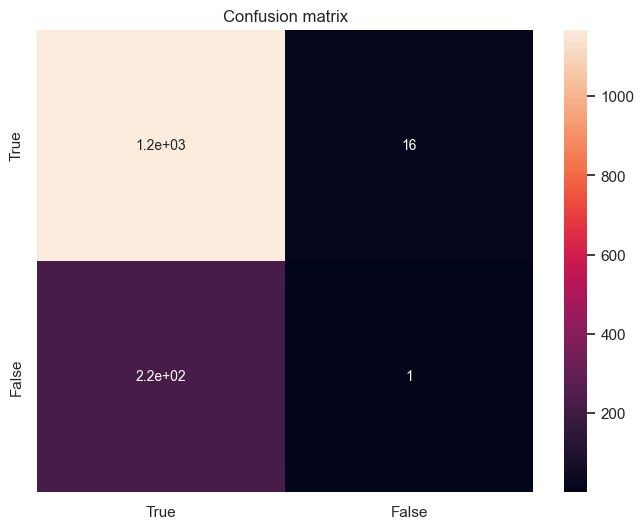

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["True","False"], xticklabels=["True","False"])
plt.title('Confusion matrix')

with normelized var

In [84]:
knn_scaled=KNeighborsClassifier(n_neighbors=9,p=2)
knn.fit(fv_train_scaled,etiq_train)

KNeighborsClassifier(n_neighbors=9)

In [85]:
yknn_scaled=knn.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yknn_scaled))
print("F1-score KNN : ",metrics.f1_score(etiq_test, yknn_scaled, average='macro'))

Accuracy :  0.892679459843639
F1-score KNN :  0.7747785757824717


Text(0.5, 1.0, 'Confusion matrix')

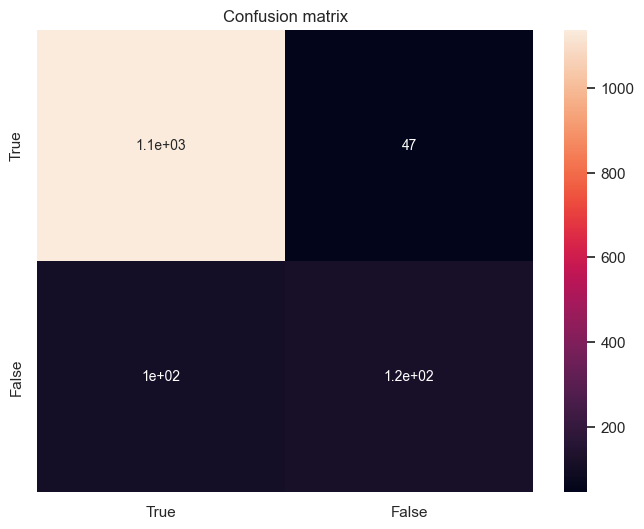

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yknn_scaled), annot=True, annot_kws={"size": 10}, yticklabels=["True","False"], xticklabels=["True","False"])
plt.title('Confusion matrix')

### Random forest

In [87]:
forrest = RandomForestClassifier(n_estimators = 300, max_features = 'log2', criterion = 'entropy', class_weight='balanced').fit(fv_train,etiq_train)
yforrest = forrest.predict(fv_test)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest, average = "macro"))

Accuracy :  0.997867803837953
F1-score :  0.9960105817405431


we see that random forest give us a better result and a very good accuracy

Text(0.5, 1.0, 'Confusion matrix')

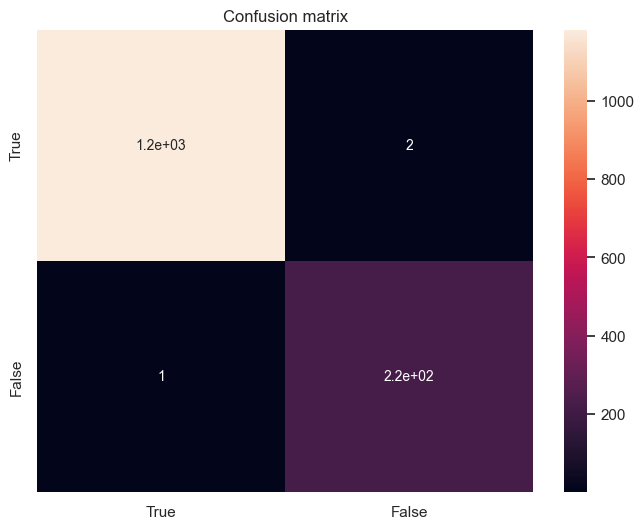

In [88]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest), annot=True, annot_kws={"size": 10}, yticklabels=["True","False"], xticklabels=["True","False"])
plt.title('Confusion matrix')

with normelize features

In [89]:
forrest = RandomForestClassifier(n_estimators = 300, max_features ='log2', criterion = 'entropy', class_weight='balanced').fit(fv_train_scaled,etiq_train)
yforrest_scaled = forrest.predict(fv_test_scaled)
print("Accuracy : ",metrics.accuracy_score(etiq_test, yforrest))
print("F1-score : ",metrics.f1_score(etiq_test, yforrest_scaled, average = "macro"))

Accuracy :  0.997867803837953
F1-score :  0.9960105817405431


we got the same result with the previews test

Text(0.5, 1.0, 'Confusion matrix')

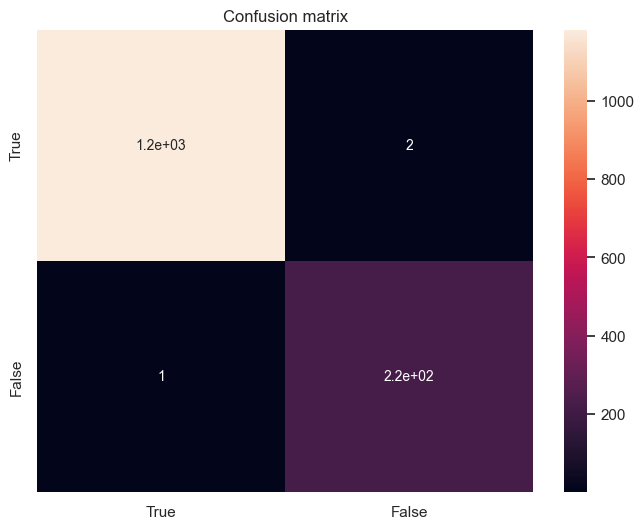

In [90]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(etiq_test, yforrest_scaled), annot=True, annot_kws={"size": 10}, yticklabels=["True","False"], xticklabels=["True","False"])
plt.title('Confusion matrix')